<a href="https://colab.research.google.com/github/W-Srikongpan/DPDM2023/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##Data Preparation

In [ ]:
import pandas as pd
import numpy as np

Number of Instances: 690

Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

 Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)


In [ ]:
col_name = ['a1','a2','a3','a4','a5','a6','a7','a8','a9',
            'a10','a11','a12','a13','a14','a15','a16']

In [ ]:
credit = pd.read_csv('/content/drive/MyDrive/DPDM2023_DATA/crx.data',header = None,names = col_name)

In [ ]:
print(credit.shape)
credit.head()

In [ ]:
credit = credit[['a3','a8','a9','a10','a11','a12','a13','a15','a16']]

In [ ]:
credit.isnull().any() #check null

preeprocessing

In [ ]:
credit = credit.replace({'t':1,'f':0,'g':1,'p':2,'s':3,'+':1,'-':0})
#change tesx to number >> t is 1, f is 0
credit

##Try simple ML

In [ ]:
import numpy as np

In [ ]:
np.random.seed(seed = 1 ) #set seed = 1

In [ ]:
a = np.random.randint(2,size = len(credit),) #random number 0 and 1 ,size 690
a

In [ ]:
train = credit[a==1] #let a = 1 is train
train.shape

In [ ]:
test = credit[a==0] #let a = 0 is test
test.shape

#Start Decision Tree

###Import

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

##Defind

In [ ]:
Dtreet1 =  DecisionTreeClassifier(random_state=0)
Dtreet1

##Train

In [ ]:
X_train = train.iloc[:,:-1] #let train x and y
Y_train = train.iloc[:,-1]

In [ ]:
Dtreet1 = Dtreet1.fit(X_train,Y_train)
Dtreet1

In [ ]:
tree.plot_tree(Dtreet1); #plot decision tree

##Test


In [ ]:
X_test = test.iloc[:,:-1] #let test x and y
Y_test = test.iloc[:,-1]

In [ ]:
y_predict = Dtreet1.predict(X_test) #predict y from X_test

In [ ]:
y_predict

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_predict) #accuracy by y test and y predict

## Set parameter

###Import


In [ ]:
from sklearn.tree import DecisionTreeClassifier

###Defind

In [ ]:
Dtreet2 = DecisionTreeClassifier(random_state=0, max_depth=4) #Add max_depth=4 is version 2

###train

In [ ]:
Dtreet2 = Dtreet2.fit(X_train,Y_train)

In [ ]:
tree.plot_tree(Dtreet2); #plot decision tree

###Test

In [ ]:
y_predic2 = Dtreet2.predict(X_test)

In [ ]:
accuracy_score(Y_test,y_predic2) #if let max_depth=4 have accuracy better than version 1

# HW 5

build a decision tree model which has better accurancy than 0.86 and descibe about parameters you set

##Import


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import numpy as np

##Solution


In [ ]:
scores_acc = []

for max_depth in range(1,11):
    #defind
    Dtree = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
    #train
    Dtree2 = Dtree.fit(X_train, Y_train)
    #test
    y_predic = Dtree2.predict(X_test)
    scores = accuracy_score(Y_test, y_predic)
    scores_acc.append(scores)
    print(f"max_depth={max_depth}, min_samples_split={i}, Accuracy={scores}")

In [ ]:
max_scores = np.max(scores_acc)
print("Maximum Accuracy:", max_scores)

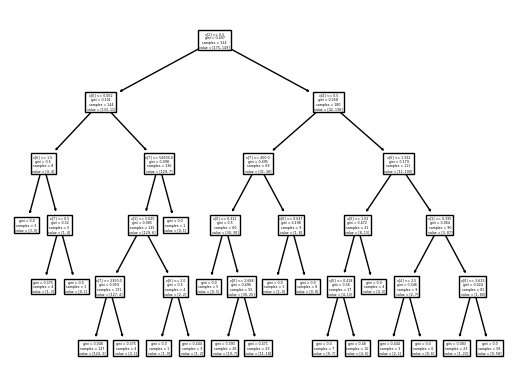

In [197]:
Dtree = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
Dtree2 = Dtree.fit(X_train, Y_train)
tree.plot_tree(Dtree2);

The accuaracy will increase. Therefore the accuracy is 0.8715846994535519

DecisionTreeClassifier

    DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0

##Solution

In [198]:
scores_acc2 = []

for max_depth in range(1,6):
    for i in range(2, 51):
        # Define
        Dtree = DecisionTreeClassifier(random_state=0, max_depth=max_depth, min_samples_split=i)

        # Train
        Dtree2 = Dtree.fit(X_train, Y_train)

        # Test
        y_predic = Dtree2.predict(X_test)


        scores = accuracy_score(Y_test, y_predic)
        scores_acc2.append(scores)
        print(f"max_depth={max_depth}, min_samples_split={i}, Accuracy={scores}")

max_depth=1, min_samples_split=2, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=3, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=4, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=5, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=6, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=7, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=8, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=9, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=10, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=11, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=12, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=13, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=14, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=15, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=16, Accuracy=0.8715846994535519
max_depth=1, min_samples_split=17, Accuracy=0.8715846994535519


In [ ]:
max_scores2 = np.max(scores_acc2)
print("Maximum Accuracy:", max_scores2)

In [ ]:
#by ax_depth=5, min_samples_split=22, Accuracy=0.8825136612021858
Dtree = DecisionTreeClassifier(random_state=0, max_depth=5 , min_samples_split=22)
Dtree2 = Dtree.fit(X_train, Y_train)
tree.plot_tree(Dtree2);

The accuaracy will increase. Therefore the best accuracy is 0.8825136612021858